In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import   RobustScaler ,StandardScaler

In [2]:
df=pd.read_csv("DataSet.csv")

replaced ',' with '.'  , ';' with ',' and '?' with null values

In [3]:
df.head(5)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
len(df)

690

In [5]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [6]:
df['A16'] = df['A16'].str.replace('+', '0')
df['A16'] = df['A16'].str.replace('-', '1')
df['A16'] = df['A16'].astype(int)
        

In [7]:
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,0


In [8]:
df.tail(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,1
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,1
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,1
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,1


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

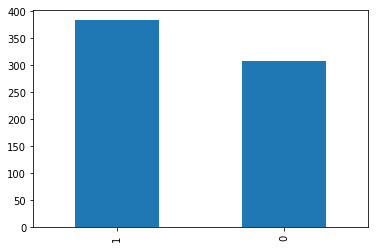

In [10]:
df['A16'].value_counts().plot.bar()

In [11]:
df['A16'].value_counts()

1    383
0    307
Name: A16, dtype: int64

In [12]:
df['A1'].value_counts()

b    468
a    210
Name: A1, dtype: int64

A2,A3,A8,A11,A14,A15- continous variables and A2 , A14  have missing values

check and impute missing values for continous variables

In [13]:
df['A2'].max() , df['A2'].min()

(80.25, 13.75)

In [14]:
 df['A2'].mean() , df['A2'].median()

(31.56817109144546, 28.46)

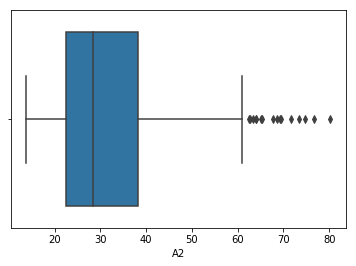

In [17]:
sns.boxplot(x=df['A2'])

seems like the values after 60 are kind of outliers 

In [16]:
import seaborn as sns

distribution plot to check data distribution

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexi

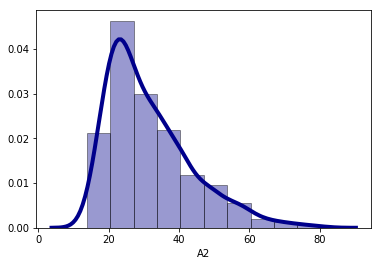

In [18]:
sns.distplot(df['A2'], hist=True, kde=True, 
             bins=int(100/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

 so most of values lies between 20-40

In [19]:
df['A2']=df['A2'].fillna(df['A2'].median())

In [20]:
df['A2'].isnull().sum()

0

In [127]:
df_bkup=df.copy()

#taking log of the values to handle outliers

In [128]:
df['A2'] = [np.log(x) for x in df['A2']]

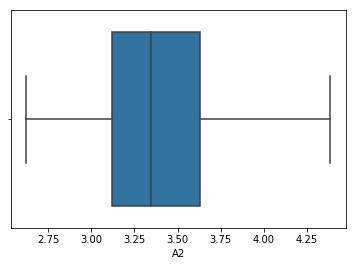

In [129]:
sns.boxplot(x=df['A2'])

In [130]:
df['A14'].max() , df['A14'].min()

(2000.0, 0.0)

In [131]:
 df['A14'].mean() , df['A14'].median()

(184.01477104874445, 160.0)

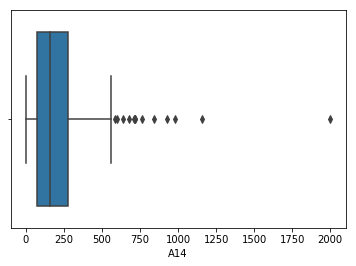

In [132]:
sns.boxplot(x=df['A14'])

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexi

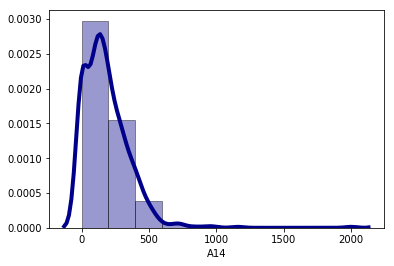

In [133]:
sns.distplot(df['A14'], hist=True, kde=True, 
             bins=int(100/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

as it seems it has few outliers data which are more than 1000, so we can impute missing data with median 

In [134]:
df['A14']=df['A14'].fillna(df['A14'].median())

In [135]:
df['A14'].isnull().sum()

0


as A14 feature has zero values we will try log(x+1) transform

In [136]:
df['A14'] = [np.log(x+1) for x in df['A14']]

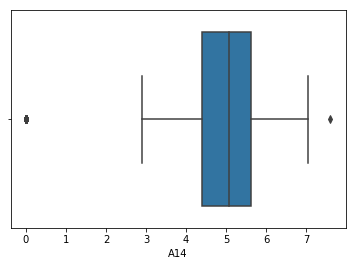

In [137]:
sns.boxplot(x=df['A14'])

In [138]:
df[df['A14'] < 2]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
12,a,3.644144,6.000,u,g,k,v,1.000,t,f,0,t,g,0.0,0,0
13,b,3.872866,6.040,u,g,k,v,0.040,f,f,0,f,g,0.0,2690,0
14,a,3.824939,10.500,u,g,q,v,5.000,t,t,7,t,g,0.0,0,0
18,b,3.083285,0.250,u,g,d,h,0.665,t,f,0,t,g,0.0,0,0
22,a,3.865979,8.000,u,g,c,v,7.875,t,t,6,t,g,0.0,1260,0
26,a,3.850148,13.000,u,g,i,bb,5.165,t,t,9,t,g,0.0,0,0
27,b,4.035656,18.500,u,g,d,bb,15.000,t,t,17,t,g,0.0,0,0
28,b,4.050393,8.500,u,g,e,h,7.000,t,t,3,f,g,0.0,0,0
31,b,3.737670,9.790,u,g,x,h,7.960,t,t,8,f,g,0.0,0,0
32,b,3.901973,7.585,u,g,i,bb,7.585,t,t,15,t,g,0.0,5000,0


In [139]:
#so now there are few outliers from the boxplot , which we can scale it while doing normalizing


In [140]:
#from scipy import stats

#df['A14'] = stats.boxcox(df['A14'])[0]
#boxcox didnot work here as it has -ve values

In [141]:
df.isnull().sum()

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

so now there is no missing values for A2 and A14 continous variable ,now we can treat if any outliers in other continous variables

before we start looking at categorical data we can normalize the continous variables, as for the data distributins  it seems few  variable  has few outliers we can do log scale and robust scaling which helps model robust to outliers out of this A2,A3,A8,A11,A14,A15 - A14


In [142]:
df['A3'].max(),df['A3'].min(),df['A3'].mean(),df['A3'].median()

(28.0, 0.0, 4.7587246376811585, 2.75)

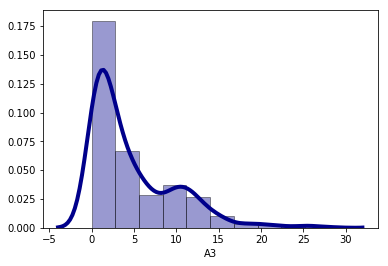

In [143]:
sns.distplot(df['A3'], hist=True, kde=True, 
             bins=int(100/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

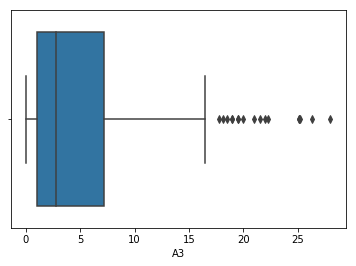

In [144]:
 sns.boxplot(x=df['A3'])

from plot it seems rightly skewed and outliers are on right side and has zero values so we can do log(x+1) transform

In [145]:
df['A3'] = [np.log(x+1) for x in df['A3']]

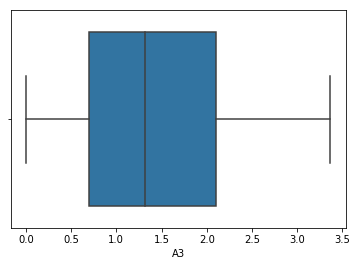

In [146]:
 sns.boxplot(x=df['A3'])

In [147]:
df['A8'].max(),df['A8'].min(),df['A8'].mean(),df['A8'].median()

(28.5, 0.0, 2.2234057971014476, 1.0)

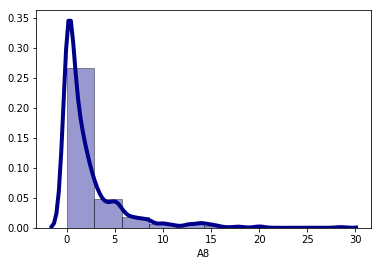

In [148]:
sns.distplot(df['A8'], hist=True, kde=True, 
             bins=int(100/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

it is also right skewed and has zero values , so will do same log transform

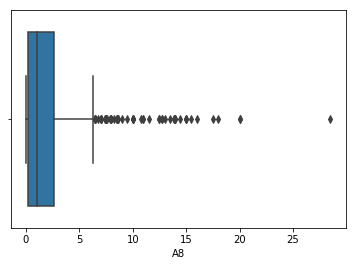

In [149]:
 sns.boxplot(x=df['A8'])

In [150]:
 df['A8'] = [np.log(x+1) for x in df['A8']]

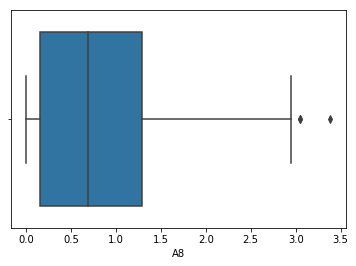

In [151]:
 sns.boxplot(x=df['A8'])

In [152]:
df=df[df['A8'] < 3.0] 

In [153]:
#removed the outliers as these are only 3 so does not have much impact if we drop them

In [154]:
len(df)

687

In [155]:
df['A11'].max(),df['A11'].min(),df['A11'].mean(),df['A11'].median()

(67, 0, 2.3260553129548764, 0.0)

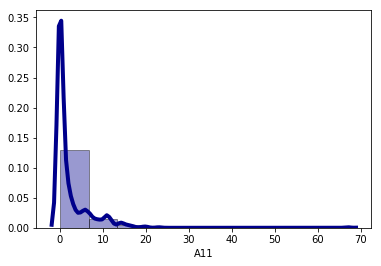

In [156]:
sns.distplot(df['A11'], hist=True, kde=True, 
             bins=int(100/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

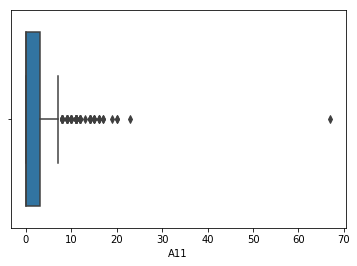

In [157]:
 sns.boxplot(x=df['A11'])

from plot it is rights skewed and has number of outliers 

In [158]:
 df['A11'] = [np.log(x+1) for x in df['A11']]

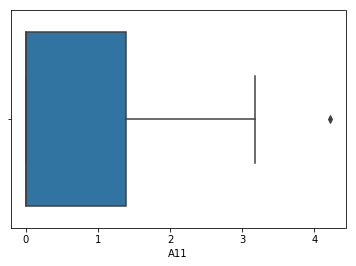

In [159]:
 sns.boxplot(x=df['A11'])

In [160]:
df=df[df['A11'] < 4] #removed the outlier

In [161]:
len(df),df.shape

(686, (686, 16))

In [162]:
df['A15'].max(),df['A15'].min(),df['A15'].mean(),df['A15'].median()

(100000, 0, 1021.1705539358601, 4.5)

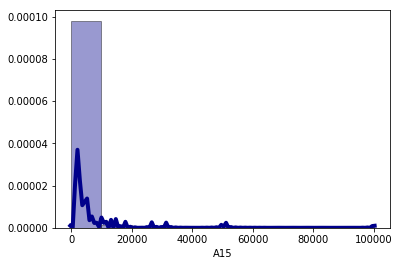

In [163]:
sns.distplot(df['A15'], hist=True, kde=True, 
             bins=int(100/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

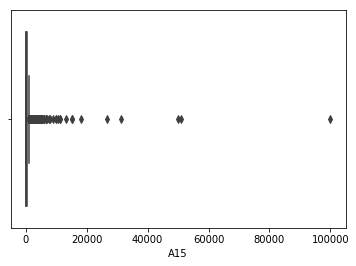

In [164]:
 sns.boxplot(x=df['A15'])

In [165]:
 df['A15'] = [np.log(x+1) for x in df['A15']]

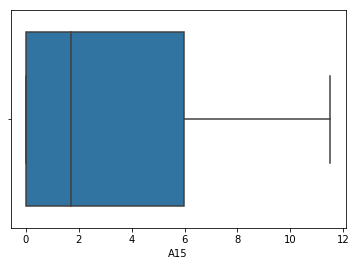

In [166]:
sns.boxplot(x=df['A15'])

so till now we have handled outlier and missing values of contnous variables , now we can scale them to normalize 

we have dropped few outlier values , so reset index 

In [167]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [168]:
df1=df[['A2','A3','A8','A11','A14','A15']].copy()

we will use sklearn.RobustScaler as it is robust to outliers , so model will not influenced by outlier data 

In [169]:
scaler =RobustScaler() 

In [170]:
scaled_df1= scaler.fit_transform(df1)

In [171]:
scaled_df1 = pd.DataFrame(scaled_df1, columns=['A2','A3','A8','A11','A14','A15'])

In [172]:
scaled_df1.head(5)


,A2,A3,A8,A11,A14,A15
0,0.158929,-0.953445,0.104786,0.500000,0.190780,-0.284254
1,1.437376,0.271005,0.625511,1.403677,-1.067647,0.773755
2,-0.297689,-0.660964,0.198520,0.000000,0.458387,0.838218
3,-0.044477,-0.281031,0.769545,1.292481,-0.383766,-0.052536
4,-0.684094,0.410515,0.270277,0.000000,-0.235069,-0.284254


In [173]:
df_unscaled=df.copy() # keeping a backup

In [174]:
df=df.drop(['A2','A3','A8','A11','A14','A15'], axis=1)

In [175]:
 df.columns

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16'], dtype='object')

merge back to dataframe with scaled values 

In [176]:
df2=pd.concat([df, scaled_df1], axis=1)

In [177]:
 df2.shape,df.shape,scaled_df1.shape

((686, 16), (686, 10), (686, 6))

In [178]:
df2.head(3)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15
0,b,u,g,w,v,t,t,f,g,0,0.158929,-0.953445,0.104786,0.500000,0.190780,-0.284254
1,a,u,g,q,h,t,t,f,g,0,1.437376,0.271005,0.625511,1.403677,-1.067647,0.773755
2,a,u,g,q,h,t,f,f,g,0,-0.297689,-0.660964,0.198520,0.000000,0.458387,0.838218


In [179]:
 #NOw handle missing values of categorical variables 

In [180]:
df2['A1'].isnull().sum() 

12

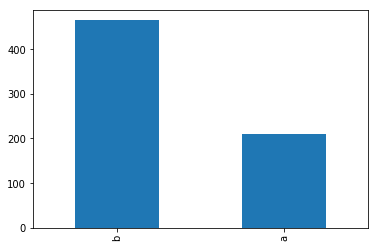

In [181]:
df['A1'].value_counts().plot.bar() 

In [182]:
 df['A1'].value_counts()

b    464
a    210
Name: A1, dtype: int64

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
df2['A1'].head()

0    b
1    a
2    a
3    b
4    b
Name: A1, dtype: object

In [188]:
#from missingpy import KNNImputer


In [256]:
 for i in range(len(df2)):
        if df2['A1'][i]=='a':
            df2['A1'][i]='0'
        elif df2['A1'][i]=='b':
            df2['A1'][i]='1'
        else:
            df2['A1'][i]=np.nan
            
            

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

In [266]:
df2['A1'].head()

0    1
1    0
2    0
3    1
4    1
Name: A1, dtype: object

In [267]:
 df2=df2.sort_values(by=['A1'])

In [269]:
df2.tail(13)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15
685,1,u,g,c,h,f,f,t,g,1,0.410986,0.111196,1.366317,0.000000,-4.182148,-0.284254
245,NaN,u,g,c,bb,t,t,f,g,0,-0.297689,0.937235,0.939517,0.792481,-0.639773,0.735035
323,NaN,u,g,i,bb,f,f,f,s,1,0.717104,0.131517,-0.255936,0.000000,1.626005,-0.284254
342,NaN,u,g,c,v,f,f,t,g,1,0.248398,-0.292481,-0.418139,0.000000,0.691488,0.520100
370,NaN,u,g,aa,v,f,f,f,g,1,-0.020350,-0.621204,-0.581766,0.000000,0.397619,0.871206
449,NaN,u,g,w,v,f,f,t,g,1,0.088078,-0.585684,-0.418139,0.000000,0.514975,-0.284254
475,NaN,y,p,NaN,NaN,f,f,f,s,1,-0.141774,-0.007736,-0.544081,0.000000,-0.565385,-0.284254
485,NaN,u,g,q,v,f,f,t,g,1,0.924838,-0.453445,-0.511873,0.000000,0.407025,-0.284254
516,NaN,u,g,k,v,t,t,f,g,0,-0.659618,0.590286,0.198520,0.500000,0.000000,0.628312
594,NaN,u,g,q,v,f,t,f,g,0,-0.692979,-0.868483,0.000000,0.500000,0.332004,0.826469


In [276]:
df2=df2.reset_index()
df2=df2.drop(['index'],axis=1)

In [277]:
df2.tail(13)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15
673,1,u,g,c,h,f,f,t,g,1,0.410986,0.111196,1.366317,0.000000,-4.182148,-0.284254
674,NaN,u,g,c,bb,t,t,f,g,0,-0.297689,0.937235,0.939517,0.792481,-0.639773,0.735035
675,NaN,u,g,i,bb,f,f,f,s,1,0.717104,0.131517,-0.255936,0.000000,1.626005,-0.284254
676,NaN,u,g,c,v,f,f,t,g,1,0.248398,-0.292481,-0.418139,0.000000,0.691488,0.520100
677,NaN,u,g,aa,v,f,f,f,g,1,-0.020350,-0.621204,-0.581766,0.000000,0.397619,0.871206
678,NaN,u,g,w,v,f,f,t,g,1,0.088078,-0.585684,-0.418139,0.000000,0.514975,-0.284254
679,NaN,y,p,NaN,NaN,f,f,f,s,1,-0.141774,-0.007736,-0.544081,0.000000,-0.565385,-0.284254
680,NaN,u,g,q,v,f,f,t,g,1,0.924838,-0.453445,-0.511873,0.000000,0.407025,-0.284254
681,NaN,u,g,k,v,t,t,f,g,0,-0.659618,0.590286,0.198520,0.500000,0.000000,0.628312
682,NaN,u,g,q,v,f,t,f,g,0,-0.692979,-0.868483,0.000000,0.500000,0.332004,0.826469


In [278]:
X = pd.DataFrame({'A1':df2['A1'], 'A16':df2['A16'],'A2':df2['A2'],'A3':df2['A3'],'A8':df2['A8'],'A11':df2['A11'],'A14':df2['A14'],'A15':df2['A15']})

In [404]:
# X.tail(13)

In [308]:
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer= KNeighborsClassifier(3, weights='distance')

In [392]:
X_train=X.iloc[:674,1:]
y_train=X.iloc[:674,0]
X_test=X.iloc[674:,1:]

In [393]:
impute_model=imputer.fit(X_train,y_train)


In [394]:
A1_pred=impute_model.predict(X_test)

In [395]:
A1_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [396]:
A1_pred=A1_pred.astype(int)

In [397]:
A1_pred=pd.DataFrame(A1_pred,columns=['A1'])

merge together predicted values withnon mising values 

In [398]:
X_train=pd.concat([X_train, y_train], axis=1)

In [399]:
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

In [400]:
X_test=pd.concat([X_test, A1_pred], axis=1)

In [409]:
X1=pd.concat([X_train,X_test], axis=0)

In [415]:
X1=X1.reset_index()
X1=X1.drop(['index'],axis=1)

In [420]:
X1['A1']=X1['A1'].astype(int)

In [421]:
X1.tail()

,A16,A2,A3,A8,A11,A14,A15,A1
681,0,-0.659618,0.590286,0.198520,0.5,0.000000,0.628312,1
682,0,-0.692979,-0.868483,0.000000,0.5,0.332004,0.826469,1
683,1,0.785031,-0.223729,-0.616658,0.0,-0.052776,-0.168395,1
684,1,0.304285,-0.103225,0.721444,0.0,0.182631,0.544109,1
685,1,0.071311,-0.160964,0.360722,0.0,0.384908,0.198870,0


In [422]:
#so now we have done for A1  mising values 
#now we will merge it with originical dataframe , before proceeding to next variable 


In [423]:
df2=df2.drop(['A16','A2','A3','A8','A11','A14','A15','A1'],axis=1)

In [424]:
df2.columns

Index(['A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')

In [425]:
df2=pd.concat([df2, X1], axis=1)

In [427]:
df2.isnull().sum()

A4     6
A5     6
A6     9
A7     9
A9     0
A10    0
A12    0
A13    0
A16    0
A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
A1     0
dtype: int64

In [428]:
#So next we have A4 ,A5,A6,A7 missing variables

(<matplotlib.axes._subplots.AxesSubplot at 0x7f15c625f9b0>, u    516
 y    162
 l      2
 Name: A4, dtype: int64)

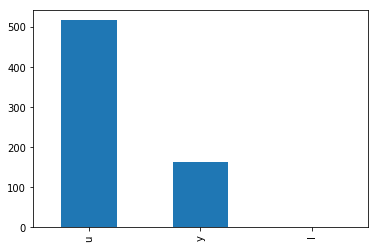

In [430]:
df2['A4'].value_counts().plot.bar(),df2['A4'].value_counts()

In [431]:
 df2=df2.sort_values(by=['A4'])

In [435]:
df2.tail(7)

,A4,A5,A6,A7,A9,A10,A12,A13,A16,A2,A3,A8,A11,A14,A15,A1
679,y,p,e,h,f,f,f,g,1,0.071311,-0.160964,0.360722,0.0,0.384908,0.198870,0
680,NaN,NaN,NaN,NaN,f,f,f,p,0,1.832543,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
681,NaN,NaN,NaN,NaN,f,f,f,p,0,-0.211979,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
682,NaN,NaN,NaN,NaN,f,f,f,p,1,0.386999,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
683,NaN,NaN,NaN,NaN,f,f,f,p,0,-0.408587,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
684,NaN,NaN,NaN,NaN,f,f,f,p,1,-0.659618,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
685,NaN,NaN,NaN,NaN,f,f,f,p,0,0.552301,-0.953445,-0.616658,0.0,0.000000,-0.284254,1


In [434]:
df2=df2.reset_index(drop=True)
 

In [452]:
X_train=df2.iloc[:680,8:]
y_train=df2.iloc[:680,0]
X_test=df2.iloc[680:,8:]

In [453]:
X_train.shape,y_train.shape,X_test.shape

((680, 8), (680,), (6, 8))

In [454]:
impute_model=imputer.fit(X_train,y_train)

In [455]:
A4_pred=impute_model.predict(X_test)

In [456]:
A4_pred=pd.DataFrame(A4_pred,columns=['A4'])

In [457]:
A4_pred.head()

,A4
0,u
1,u
2,y
3,u
4,u


In [458]:
X_test=X_test.reset_index(drop=True)

In [459]:
X_test=pd.concat([A4_pred, X_test], axis=1)

In [461]:
X_train=pd.concat([y_train,X_train],axis=1)

In [462]:
A4=pd.concat([X_train,X_test], axis=0)

In [465]:
len(A4)

686

In [466]:
A4=A4.reset_index(drop=True)

In [467]:
A4.tail()

,A4,A16,A2,A3,A8,A11,A14,A15,A1
681,u,0,-0.211979,-0.953445,-0.616658,0.0,0.0,-0.284254,0
682,y,1,0.386999,-0.953445,-0.616658,0.0,0.0,-0.284254,1
683,u,0,-0.408587,-0.953445,-0.616658,0.0,0.0,-0.284254,1
684,u,1,-0.659618,-0.953445,-0.616658,0.0,0.0,-0.284254,1
685,u,0,0.552301,-0.953445,-0.616658,0.0,0.0,-0.284254,1


In [468]:
df2=df2.drop(['A4','A16','A2','A3','A8','A11','A14','A15','A1'],axis=1)

In [469]:
df2=pd.concat([df2, A4], axis=1)

In [471]:
df2.isnull().sum()

A5     6
A6     9
A7     9
A9     0
A10    0
A12    0
A13    0
A4     0
A16    0
A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
A1     0
dtype: int64

In [472]:
#So next we have A5,A6,A7 missing variables remaining

(<matplotlib.axes._subplots.AxesSubplot at 0x7f15c6177710>, g     516
 p     162
 gg      2
 Name: A5, dtype: int64)

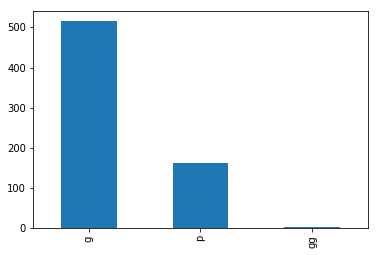

In [473]:
df2['A5'].value_counts().plot.bar(),df2['A5'].value_counts()

In [474]:
df2=df2.sort_values(by=['A5'])
df2=df2.reset_index(drop=True)

In [476]:
df2.tail(7)

,A5,A6,A7,A9,A10,A12,A13,A4,A16,A2,A3,A8,A11,A14,A15,A1
679,p,e,h,f,f,f,g,y,1,0.071311,-0.160964,0.360722,0.0,0.384908,0.198870,0
680,NaN,NaN,NaN,f,f,f,p,u,0,1.832543,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
681,NaN,NaN,NaN,f,f,f,p,u,0,-0.211979,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
682,NaN,NaN,NaN,f,f,f,p,y,1,0.386999,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
683,NaN,NaN,NaN,f,f,f,p,u,0,-0.408587,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
684,NaN,NaN,NaN,f,f,f,p,u,1,-0.659618,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
685,NaN,NaN,NaN,f,f,f,p,u,0,0.552301,-0.953445,-0.616658,0.0,0.000000,-0.284254,1


In [477]:
X_train=df2.iloc[:680,8:]
y_train=df2.iloc[:680,0]
X_test=df2.iloc[680:,8:]
X_train.shape,y_train.shape,X_test.shape

((680, 8), (680,), (6, 8))

In [478]:
impute_model=imputer.fit(X_train,y_train)
A5_pred=impute_model.predict(X_test)
A5_pred=pd.DataFrame(A5_pred,columns=['A5'])

In [480]:
X_test=X_test.reset_index(drop=True)
X_test=pd.concat([A5_pred, X_test], axis=1)

In [481]:
X_train=pd.concat([y_train,X_train],axis=1)
A5=pd.concat([X_train,X_test], axis=0)

In [482]:
A5=A5.reset_index(drop=True)

In [483]:
A5.tail(7)

,A5,A16,A2,A3,A8,A11,A14,A15,A1
679,p,1,0.071311,-0.160964,0.360722,0.0,0.384908,0.198870,0
680,g,0,1.832543,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
681,g,0,-0.211979,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
682,p,1,0.386999,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
683,g,0,-0.408587,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
684,g,1,-0.659618,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
685,g,0,0.552301,-0.953445,-0.616658,0.0,0.000000,-0.284254,1


In [484]:
df2=df2.drop(['A5','A16','A2','A3','A8','A11','A14','A15','A1'],axis=1)
df2=pd.concat([df2, A5], axis=1)

In [485]:
len(df2),df2.isnull().sum()

(686, A6     9
 A7     9
 A9     0
 A10    0
 A12    0
 A13    0
 A4     0
 A5     0
 A16    0
 A2     0
 A3     0
 A8     0
 A11    0
 A14    0
 A15    0
 A1     0
 dtype: int64)

In [486]:
#So next we have A6,A7 missing variables remaining

(<matplotlib.axes._subplots.AxesSubplot at 0x7f15c6148320>, c     136
 q      78
 w      64
 i      59
 aa     54
 ff     53
 k      51
 cc     40
 m      38
 x      38
 d      30
 e      23
 j      10
 r       3
 Name: A6, dtype: int64)

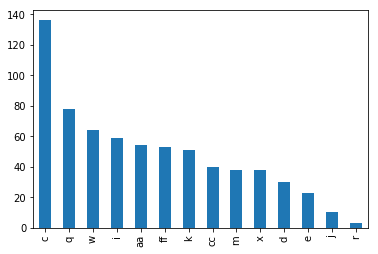

In [487]:
df2['A6'].value_counts().plot.bar(),df2['A6'].value_counts()

In [488]:
df2=df2.sort_values(by=['A6'])
df2=df2.reset_index(drop=True)
df2.tail(10)

,A6,A7,A9,A10,A12,A13,A4,A5,A16,A2,A3,A8,A11,A14,A15,A1
676,x,h,t,t,t,g,u,g,0,0.323955,-0.223729,0.899971,1.160964,0.375244,0.844774,1
677,NaN,NaN,t,f,f,g,u,g,1,2.059707,0.396775,-0.232523,0.000000,-4.182148,0.690541,1
678,NaN,NaN,f,f,f,s,y,p,1,-0.141774,-0.007736,-0.544081,0.000000,-0.565385,-0.284254,1
679,NaN,NaN,f,f,t,g,y,p,1,0.785031,-0.223729,-0.616658,0.000000,-0.052776,-0.168395,1
680,NaN,NaN,f,f,f,p,u,g,0,1.832543,-0.953445,-0.616658,0.000000,0.000000,-0.284254,0
681,NaN,NaN,f,f,f,p,u,g,0,-0.211979,-0.953445,-0.616658,0.000000,0.000000,-0.284254,0
682,NaN,NaN,f,f,f,p,y,p,1,0.386999,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1
683,NaN,NaN,f,f,f,p,u,g,0,-0.408587,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1
684,NaN,NaN,f,f,f,p,u,g,1,-0.659618,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1
685,NaN,NaN,f,f,f,p,u,g,0,0.552301,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1


In [489]:
X_train=df2.iloc[:677,8:]
y_train=df2.iloc[:677,0]
X_test=df2.iloc[677:,8:]
X_train.shape,y_train.shape,X_test.shape

((677, 8), (677,), (9, 8))

In [490]:
impute_model=imputer.fit(X_train,y_train)
A6_pred=impute_model.predict(X_test)
A6_pred=pd.DataFrame(A6_pred,columns=['A6'])

In [491]:
X_test=X_test.reset_index(drop=True)
X_test=pd.concat([A6_pred, X_test], axis=1)
X_train=pd.concat([y_train,X_train],axis=1)
A6=pd.concat([X_train,X_test], axis=0)
A6=A6.reset_index(drop=True)


In [492]:
A6.tail(10)

,A6,A16,A2,A3,A8,A11,A14,A15,A1
676,x,0,0.323955,-0.223729,0.899971,1.160964,0.375244,0.844774,1
677,e,1,2.059707,0.396775,-0.232523,0.000000,-4.182148,0.690541,1
678,m,1,-0.141774,-0.007736,-0.544081,0.000000,-0.565385,-0.284254,1
679,k,1,0.785031,-0.223729,-0.616658,0.000000,-0.052776,-0.168395,1
680,ff,0,1.832543,-0.953445,-0.616658,0.000000,0.000000,-0.284254,0
681,cc,0,-0.211979,-0.953445,-0.616658,0.000000,0.000000,-0.284254,0
682,cc,1,0.386999,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1
683,c,0,-0.408587,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1
684,q,1,-0.659618,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1
685,k,0,0.552301,-0.953445,-0.616658,0.000000,0.000000,-0.284254,1


In [493]:
df2=df2.drop(['A6','A16','A2','A3','A8','A11','A14','A15','A1'],axis=1)
df2=pd.concat([df2, A6], axis=1)

In [494]:
df2.isnull().sum()

A7     9
A9     0
A10    0
A12    0
A13    0
A4     0
A5     0
A6     0
A16    0
A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
A1     0
dtype: int64

In [495]:
#so now we have only A7 feature 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f15c60d9668>, v     397
 h     138
 bb     59
 ff     57
 j       8
 z       6
 dd      6
 n       4
 o       2
 Name: A7, dtype: int64)

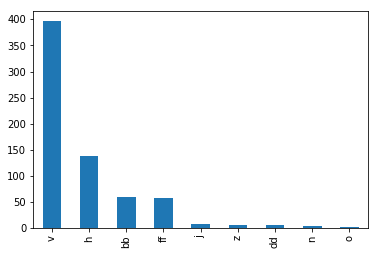

In [496]:
df2['A7'].value_counts().plot.bar(),df2['A7'].value_counts()

In [497]:
df2=df2.sort_values(by=['A7'])
df2=df2.reset_index(drop=True)
df2.tail(10)

,A7,A9,A10,A12,A13,A4,A5,A6,A16,A2,A3,A8,A11,A14,A15,A1
676,z,t,t,t,g,u,g,e,0,1.971104,1.317374,1.715149,0.5,-4.182148,0.501428,1
677,NaN,t,f,f,g,u,g,e,1,2.059707,0.396775,-0.232523,0.0,-4.182148,0.690541,1
678,NaN,f,f,f,s,y,p,m,1,-0.141774,-0.007736,-0.544081,0.0,-0.565385,-0.284254,1
679,NaN,f,f,t,g,y,p,k,1,0.785031,-0.223729,-0.616658,0.0,-0.052776,-0.168395,1
680,NaN,f,f,f,p,u,g,ff,0,1.832543,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
681,NaN,f,f,f,p,u,g,cc,0,-0.211979,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
682,NaN,f,f,f,p,y,p,cc,1,0.386999,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
683,NaN,f,f,f,p,u,g,c,0,-0.408587,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
684,NaN,f,f,f,p,u,g,q,1,-0.659618,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
685,NaN,f,f,f,p,u,g,k,0,0.552301,-0.953445,-0.616658,0.0,0.000000,-0.284254,1


In [502]:
X_train=df2.iloc[:677,8:]
y_train=df2.iloc[:677,0]
X_test=df2.iloc[677:,8:]
impute_model=imputer.fit(X_train,y_train)
A7_pred=impute_model.predict(X_test)


In [504]:
A7_pred=pd.DataFrame(A7_pred,columns=['A7'])


In [505]:
X_test=X_test.reset_index(drop=True)
X_test=pd.concat([A7_pred, X_test], axis=1)
X_train=pd.concat([y_train,X_train],axis=1)
A7=pd.concat([X_train,X_test], axis=0)
A7=A7.reset_index(drop=True)

In [507]:
A7.tail(10)

,A7,A16,A2,A3,A8,A11,A14,A15,A1
676,z,0,1.971104,1.317374,1.715149,0.5,-4.182148,0.501428,1
677,z,1,2.059707,0.396775,-0.232523,0.0,-4.182148,0.690541,1
678,v,1,-0.141774,-0.007736,-0.544081,0.0,-0.565385,-0.284254,1
679,v,1,0.785031,-0.223729,-0.616658,0.0,-0.052776,-0.168395,1
680,ff,0,1.832543,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
681,v,0,-0.211979,-0.953445,-0.616658,0.0,0.000000,-0.284254,0
682,v,1,0.386999,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
683,v,0,-0.408587,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
684,v,1,-0.659618,-0.953445,-0.616658,0.0,0.000000,-0.284254,1
685,v,0,0.552301,-0.953445,-0.616658,0.0,0.000000,-0.284254,1


In [508]:
df2=df2.drop(['A7','A16','A2','A3','A8','A11','A14','A15','A1'],axis=1)
df2=pd.concat([df2, A7], axis=1)

In [509]:
df2.isnull().sum()

A9     0
A10    0
A12    0
A13    0
A4     0
A5     0
A6     0
A7     0
A16    0
A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
A1     0
dtype: int64

In [510]:
#now all missing value are cleared , we can proceed to model feature engineering and model building

In [511]:
from sklearn import preprocessing


In [512]:
#le = preprocessing.LabelEncoder()

In [513]:
#enc = preprocessing.OneHotEncoder()

In [517]:
df2.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [516]:
df2= df2[['A1', 'A2', 'A3', 'A4', 'A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']]

In [518]:
df2_bkup=df2.copy()

In [524]:
df3=df2[['A4','A5','A6','A7','A9','A10','A12','A13']].copy()

In [525]:
df3 = pd.get_dummies(df3)

In [526]:
 df3.head()

,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,A6_cc,A6_d,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [527]:
df2=df2.drop(['A4','A5','A6','A7','A9','A10','A12','A13'],axis=1)

In [528]:
df2=pd.concat([df3, df2], axis=1)

In [529]:
df2.shape

(686, 46)

In [530]:
df2.columns

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f',
       'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p', 'A13_s', 'A1', 'A2', 'A3',
       'A8', 'A11', 'A14', 'A15', 'A16'],
      dtype='object')

#now we can build model , as it is classification problem , and we did had outlier we can use model robust to outliers ie. GBM model,randomforest

In [532]:
#lets try with logistic regression

In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [534]:
from sklearn.model_selection import train_test_split

In [535]:
X = df2.drop('A16', axis=1)
Y = df2['A16']

In [536]:
X.shape,Y.shape

((686, 45), (686,))

In [538]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify = Y,random_state=1)

In [540]:
lreg = LogisticRegression()
lreg.fit(X_train,Y_train)

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [541]:
pred_test = lreg.predict(X_test)

In [542]:
f1_score(Y_test, pred_test)

0.8648648648648649

In [543]:
#lets try with random forest  as it has been robust to outliers and easy to handle

In [544]:
from sklearn.ensemble import RandomForestClassifier

In [545]:
Rclf = RandomForestClassifier(n_jobs=2, random_state=1)

In [546]:
Rclf.fit(X_train,Y_train)

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [547]:
pred_test = Rclf.predict(X_test)

In [548]:
f1_score(Y_test, pred_test)

0.8804347826086957

In [551]:
from sklearn import metrics 
metrics.accuracy_score(Y_test, pred_test)

0.872093023255814

RANDOM FOREST gives better accuracy in default 

In [549]:
#lets try with GBM model 

In [550]:
import xgboost as xgb

In [552]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [553]:
xgb1.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [554]:
pred_test = xgb1.predict(X_test)

In [555]:
f1_score(Y_test, pred_test)

0.8911917098445595

In [556]:
metrics.accuracy_score(Y_test, pred_test)

0.877906976744186

In [557]:
##from the above  models XGBOOST gives better accuracy , we can ensemble these models for better prediction and robustness